Importar librerias

In [5]:
import numpy as np
import pandas as pd
import time
import parallel_test4 as test_3
import plotMagneticField as hplot

Test de simulacion Espira cuadrada

In [11]:
# Initialize coil parameters
X_coil = test_3.CoilParameters(1, 0.5, 36)
#X_coil = test_3.CoilParameters(0.98083217, 0.95992063, 0.00128399)

# Current coil simulation
I = np.array([1,2,3])
Ax = np.eye(3)
Ay = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  1]])
Az = np.array([[0,  0, -1], [0,  1,  0], [1,  0,  0]])

# X coil simulation
grid_length_size = 0.1
num_seg = 100

In [16]:
##Generar espiras
spire1_x_s, spire2_x_s = test_3.square_spires(Ax, X_coil.h, X_coil.a, num_seg)
spire1_y_s, spire2_y_s = test_3.square_spires(Ay, X_coil.h, X_coil.a, num_seg)
spire1_z_s, spire2_z_s = test_3.square_spires(Az, X_coil.h, X_coil.a, num_seg)

f0 = None
f0 = hplot.plot_spires(f0, spire1_x_s, spire2_x_s, color='black')
f1 = hplot.plot_spires(f0, spire1_y_s, spire2_y_s, color='red')
f2 = hplot.plot_spires(f1, spire1_z_s, spire2_z_s, color='blue')

TypeError: plot_spires() got multiple values for argument 'color'

In [4]:
# Generar grid
#X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
#hplot.plot_grid(X, Y, f)

In [5]:
# Generar grid
#X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
#X = np.array([0])  # Convertir a un arreglo de NumPy
#Y = np.array([0])
# Crear X de -a a a
grid_length_size = 0.01
X = np.arange(-X_coil.a, X_coil.a, grid_length_size)

# Crear Y como un arreglo de ceros con el mismo tamaño que X
Y = np.zeros_like(X)

hplot.plot_grid(X, Y, f)

In [6]:
# Iniciar simulacion
start_time = time.time()
x_coil_results_s = test_3.coil_simulation_1d_sequential(X, Y, X_coil, I[0], spire1_s, spire2_s, 1 , 10)
# Marcar el tiempo de fin
end_time = time.time()
# Calcular y mostrar el tiempo de ejecución
execution_time = end_time - start_time

# Guardar los resultados en un archivo CSV
output_file = 'x_coil_results_s.csv'
x_coil_results_s.to_csv(output_file, index=False)

print(f"Tiempo de ejecución: {execution_time} segundos")


Simulation Progress:   0%|          | 0/9801 [00:00<?, ?it/s]

KeyboardInterrupt: 

hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.8400000000000007
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
hola:  0.010000000000000009
hola:  0.0
Puntos contiguos: False
aa:  0.9600000000000009


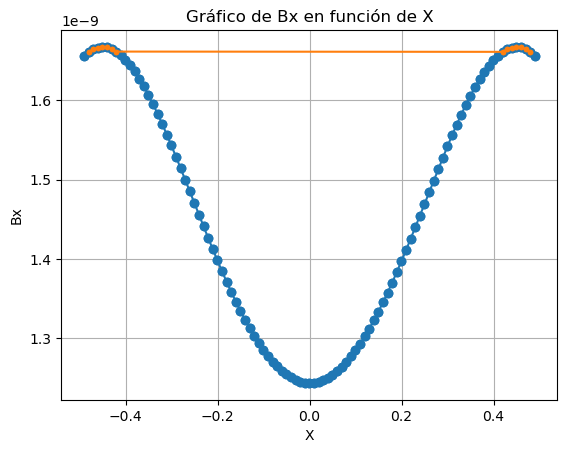

In [111]:
import matplotlib.pyplot as plt
import numpy as np

bx_line = x_coil_results_s[(x_coil_results_s['Y'] == 0) & (x_coil_results_s['Z'] == 0)]

# Calcular el valor máximo de la columna 'Bx'
max_value = bx_line['Bx'].max()

# Calcular el rango del 0.5% del valor máximo
tolerance = 0.005 * max_value
lower_bound = max_value - tolerance
upper_bound = max_value + tolerance

# Filtrar los puntos que estén dentro de ese rango
filtered_points = bx_line[(bx_line['Bx'] >= lower_bound) & (bx_line['Bx'] <= upper_bound)]

#Verificar si los puntos son contiguos
if not filtered_points.empty:
   x_values = filtered_points['X'].sort_values()
   # for i in range(1,len(x_values) - 1) :
   #     print('hola: ', x_values.iloc[i + 1] - x_values.iloc[i])
    
    #print('hola: ',x_values.iloc[0])
   # is_contiguous = all((x_values.iloc[i + 1] - x_values.iloc[i]) <= 2*grid_length_size for i in range(1,len(x_values) - 1))
   # print("Puntos contiguos:", is_contiguous)
else:
   # print("No hay puntos en el rango.")

aa = filtered_points['X'].max() - filtered_points['X'].min()

print('aa: ',aa)

x_values = np.array(bx_line['X']).flatten()  # Convertir a un arreglo 1D
bx_values = np.array(bx_line['Bx']).flatten()


x_values1 = np.array(filtered_points['X']).flatten()  # Convertir a un arreglo 1D
bx_values1 = np.array(filtered_points['Bx']).flatten()

plt.plot(x_values, bx_values, marker='o', linestyle='-')
plt.plot(x_values1, bx_values1, marker='.', linestyle='-')
plt.xlabel('X')
plt.ylabel('Bx')
plt.title('Gráfico de Bx en función de X')
plt.grid(True)
plt.show()



In [112]:
# Leer el archivo CSV
#x_coil_results_s = pd.read_csv('/home/iaapp/brayan/Helmholtz/x_coil_results_s.csv')

hplot.simple_3d_surface_plot(x_coil_results_s)

#hplot.plot_magnetic_field(x_coil_results_s)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:

spire1_c, spire2_c = test_3.circular_spires(Ax, X_coil.h, X_coil.a, num_seg)
f1 = hplot.plot_spires(spire1_c, spire2_c, color='black')

In [9]:
# Generar grid
#X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
#hplot.plot_grid(X, Y, f1)

In [10]:
# Generar grid
X, Y = test_3.generate_range(grid_length_size, grid_length_size)
hplot.plot_grid(X, Y, f1)

In [11]:
# Iniciar simulacion
start_time = time.time()
x_coil_results_c = test_3.coil_simulation_1d_sequential(X, Y, X_coil, I[0], spire1_c, spire2_c,1, 1)
# Marcar el tiempo de fin
end_time = time.time()

# Calcular y mostrar el tiempo de ejecución
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

# Guardar los resultados en un archivo CSV
output_file = '/home/iaapp/brayan/Helmholtz/x_coil_results_c.csv'
x_coil_results_c.to_csv(output_file, index=False)

print(f"Tiempo de ejecución: {execution_time} segundos")

Simulation Progress: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Tiempo de ejecución: 5.0871686935424805 segundos


OSError: Cannot save file into a non-existent directory: '/home/iaapp/brayan/Helmholtz'

In [ ]:
hplot.simple_3d_surface_plot(x_coil_results_c)